In [44]:
!pip install geopandas
!pip install colorcet
!pip install datashader
!pip install -U pandas-profiling

#restart rruntime!

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.6.0)


In [45]:
# import dei moduli necessari
import geopandas as gpd
import numpy as np
# caricamento dello shapefile del Comune di Trento con gli incidenti in un geodataframe (geopandas)
incidenti = gpd.read_file("http://webapps.comune.trento.it/cartografia/gis/dbexport?db=base&sc=vigili&ly=incidenti&fr=shp")
# informazioni sulle colonne
incidenti.info()
# descrizione delle colonne
incidenti.describe()
# descrizione delle colonne testuali
incidenti.describe(include=np.object)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16466 entries, 0 to 16465
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        10129 non-null  float64 
 1   numero    16436 non-null  float64 
 2   anno      16436 non-null  float64 
 3   coordx    16466 non-null  float64 
 4   coordy    16466 non-null  float64 
 5   fumetto   16466 non-null  object  
 6   x_gps     16456 non-null  float64 
 7   y_gps     16456 non-null  float64 
 8   geometry  16466 non-null  geometry
dtypes: float64(7), geometry(1), object(1)
memory usage: 1.1+ MB


fumetto
count      16466
unique     16437
top     anno  n.
freq          30

In [46]:
incidenti.head()

id  numero    anno  ...      x_gps      y_gps                        geometry
0 NaN   414.0  2018.0  ...  11.123654  46.075180  POINT (664215.269 5104592.978)
1 NaN   401.0  2018.0  ...  11.121463  46.064400  POINT (664077.768 5103390.726)
2 NaN   384.0  2018.0  ...  11.123040  46.090408  POINT (664122.604 5106283.608)
3 NaN   385.0  2018.0  ...  11.107405  46.104950  POINT (662871.095 5107867.145)
4 NaN   386.0  2018.0  ...  11.123209  46.038328  POINT (664290.082 5100497.659)

[5 rows x 9 columns]

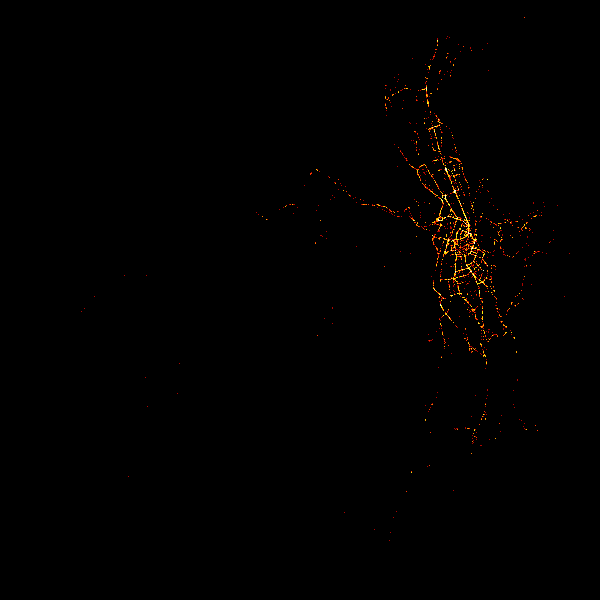

In [47]:
from colorcet import fire
import datashader as ds
from datashader import transfer_functions as tf
agg = ds.Canvas().points(incidenti, 'x_gps', 'y_gps')
tf.set_background(tf.shade(agg, cmap=fire),"black")

In [48]:
import folium
x = incidenti.to_crs({"init": "epsg:4326"}).unary_union.envelope.centroid.x
y = incidenti.to_crs({"init": "epsg:4326"}).unary_union.envelope.centroid.y
m = folium.Map([y,x], zoom_start=11, tiles="stamenterrain")
for index, row  in incidenti.to_crs({"init": "epsg:4326"}).iterrows():
  folium.CircleMarker(
    location=[row.geometry.y,row.geometry.x],
    radius=1,
    color='red',
    fill=True,
    fill_color='orange'
  ).add_to(m)
folium.LayerControl(collapsed=False).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

In [49]:
incidenti.head()

id  numero    anno  ...      x_gps      y_gps                        geometry
0 NaN   414.0  2018.0  ...  11.123654  46.075180  POINT (664215.269 5104592.978)
1 NaN   401.0  2018.0  ...  11.121463  46.064400  POINT (664077.768 5103390.726)
2 NaN   384.0  2018.0  ...  11.123040  46.090408  POINT (664122.604 5106283.608)
3 NaN   385.0  2018.0  ...  11.107405  46.104950  POINT (662871.095 5107867.145)
4 NaN   386.0  2018.0  ...  11.123209  46.038328  POINT (664290.082 5100497.659)

[5 rows x 9 columns]

In [52]:
import pandas as pd
import pandas_profiling
df = pd.DataFrame(incidenti.drop(columns='geometry'))
df.profile_report(title='Incidenti a Trento',html={'style': {'full_width': True}})


Output hidden; open in https://colab.research.google.com to view.

In [53]:
df.profile_report(title='Incidenti a Trento',)

Output hidden; open in https://colab.research.google.com to view.

In [54]:
profile = df.profile_report(title='Report dataset incidenti Trento')
profile.to_file(output_file="output1.html")

In [55]:
import pandas
import pandas_profiling
df2 = pd.read_csv("http://servizi.apss.tn.it/opendata/FARM001.csv").profile_report()

In [0]:
df2.to_file(output_file="output2.html")

## Titanic

In [0]:
# Standard Library Imports
from pathlib import Path

# Installed packages
import pandas as pd
from ipywidgets import widgets

# Our package
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

In [0]:
# Read the Titanic Dataset
file_name = cache_file(
    "titanic.csv",
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",
)
df = pd.read_csv(file_name)

In [59]:
# Generate the Profiling Report
profile = ProfileReport(df, title="Titanic Dataset", html={'style': {'full_width': True}}, sort="None")

In [60]:
# The Notebook Widgets Interface
profile.to_widgets()

In [61]:
# Or use the HTML report in an iframe
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
profile.to_file(output_file="titanic.html")

## Meteorites NASA

In [0]:
from pathlib import Path

import requests
import numpy as np
import pandas as pd

import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [0]:
file_name = cache_file(
    "meteorites.csv",
    "https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv?accessType=DOWNLOAD",
)
    
df = pd.read_csv(file_name)
    
# Note: Pandas does not support dates before 1880, so we ignore these for this analysis
df['year'] = pd.to_datetime(df['year'], errors='coerce')

# Example: Constant variable
df['source'] = "NASA"

# Example: Boolean variable
df['boolean'] = np.random.choice([True, False], df.shape[0])

# Example: Mixed with base types
df['mixed'] = np.random.choice([1, "A"], df.shape[0])

# Example: Highly correlated variables
df['reclat_city'] = df['reclat'] + np.random.normal(scale=5,size=(len(df)))

# Example: Duplicate observations
duplicates_to_add = pd.DataFrame(df.iloc[0:10])
duplicates_to_add[u'name'] = duplicates_to_add[u'name'] + " copy"

df = df.append(duplicates_to_add, ignore_index=True)

In [65]:
report = df.profile_report(sort='None', title="Meteorites NASA",html={'style':{'full_width': True}}, progress_bar=False)
report

Output hidden; open in https://colab.research.google.com to view.

In [0]:
profile_report = df.profile_report(html={'style': {'full_width': True}})
profile_report.to_file("nasa.html")

In [67]:
profile_report

Output hidden; open in https://colab.research.google.com to view.